    Businesses like banks that provide service have to worry about the problem of 'Churn', customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
    
    Management needs to configure the influences on exiting the bank and be able to modify them to keep the customers satisfied, happy an loyal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

#To have a colorful background on graphs
sns.set(color_codes=True)
%matplotlib inline
sns.set(color_codes=True)
import warnings


# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#To build model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To impute
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# To get diferent metric scores
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [2]:
# get data converting inot dataframe
df = pd.read_csv('Churn.csv')

In [3]:
# Make  copy of the original data
data = df.copy()

In [4]:
# Get top 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Get last 5 rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
print("Dataset contains {} number of rows and {} number of columns!".format(data.shape[0], data.shape[1]))

Dataset contains 10000 number of rows and 14 number of columns!


In [7]:
# Get columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are 14 columns 

In [8]:
# Get column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are:
* 9 integer datatype columns
* 3 object columns
* 2 float datatype columns

In [9]:
# Check for any null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No obvious null values.

In [10]:
# Check for any duplicate values
data.duplicated().sum()

0

No duplicated values.

In [11]:
# Get summary on a dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,NaN,NaN,NaN,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,NaN,NaN,NaN,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.00,NaN,NaN,NaN,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.00,NaN,NaN,NaN,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,NaN,NaN,NaN,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,NaN,NaN,NaN,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,NaN,NaN,NaN,1.53,0.58,1.00,1.00,1.00,2.00,4.00


Observation:

* RowNumber is the sequntial number of records, which can be dropped as has no value 
* CustomerId is the unique identifier of each customer, which also can be dropped
* Surname is the Last name of the customer, which also has no value on identifying the patterns
* CreditScore is slightly left skewed, with mean score of 650
* Geography has only 3 unique values with the most frequent location being France
* Gender has only 2 values where Male customers are the most => 5457 out of 10000
* Age ranges from 18 to 92 years old customers, which slightly right skewed
* Tenure looks as normally distributed ranging from 0 to 10 years
* Balance is left skewed with mean at ~76500
* NumOfProducts is right skewed ranging from 1 to 4 products purchased by a customer
* HasCrCard left skewed, showing that most the customers obtained the Credit cards from the bank
* IsActiveMember is also left skewed
* EstimatedSalary is slightly left skewed, ranging from ~ 11 to 200K 
* Exited is right skewed, showing there are not many customers who left the bank

In [12]:
# Let's get rid off the unusable columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# EDA

In [13]:
for col in data.columns:
    print(data[col].value_counts())

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
54     84
22     84
55     82
57     75
53     74
56     70
58     67
59     62
60     62
61     53
21     53
62     52
63     40
20     40
67     37
64     37
66     35
19     27
71     27
69     22
18     22
72     21
68     19
74     18
70     18
65     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
88      1
82      1
85      1
83      1

Observations:
* Geography has 3 unique values, where France is the most 
* Gender has 2 unique values where Male is the majority
* Customers in their 30's is the majority
* There are 413 new customers and 490 customers who use the bank for over 10 years
* Majority of the customers own at least 1 product from the bank
* 70% of the customers own the credit card from the bank
* A little more than 50% of the customers are the active members of the bank
* There is 20% of customer who left the bank within six months

Overall there is no hidden NULL values within the dataset. We re ready for the deeper visualized Analysis

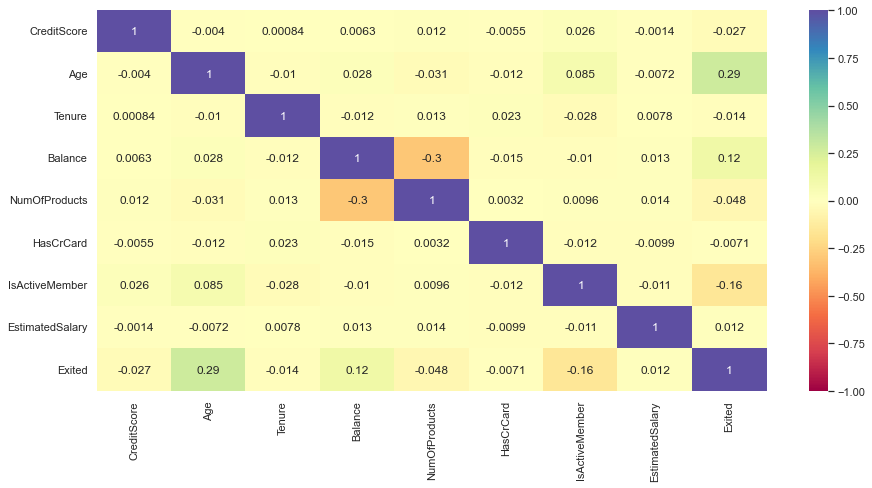

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), vmin = -1, vmax=1, cmap='Spectral', annot=True);
plt.show()

Correlation Analysis:
* There is a positive correlation between Age and Exited columns
* There is a negative correlation between NumOfProducts and Balance which makes sense, as the customer has more products the money will be spread out to the accounts, hence lower balance.
* There is a somewhat negative correlation between IsActiveMember and Exited columns

Overall, there doesn't seem to be a strong correlation among the columns.

## Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

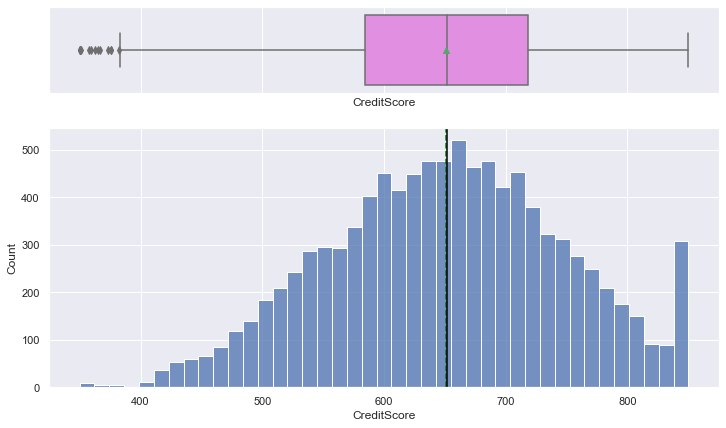

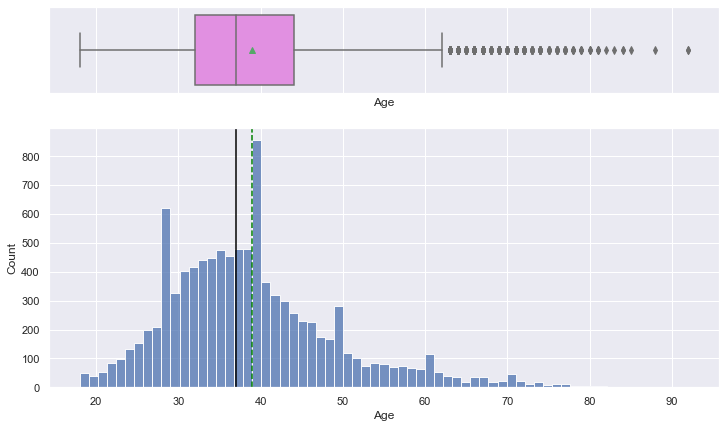

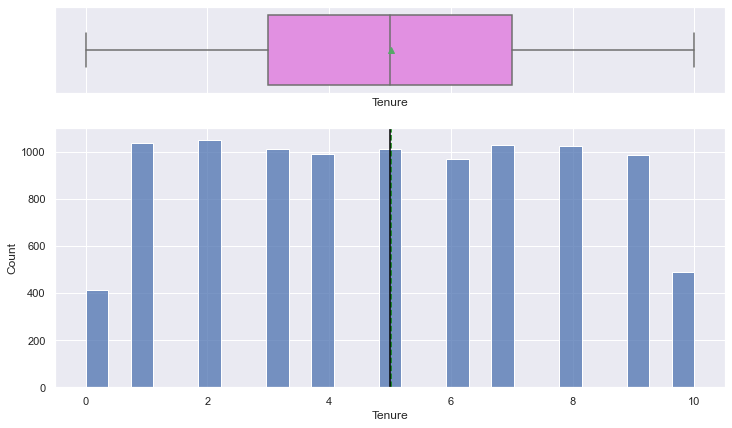

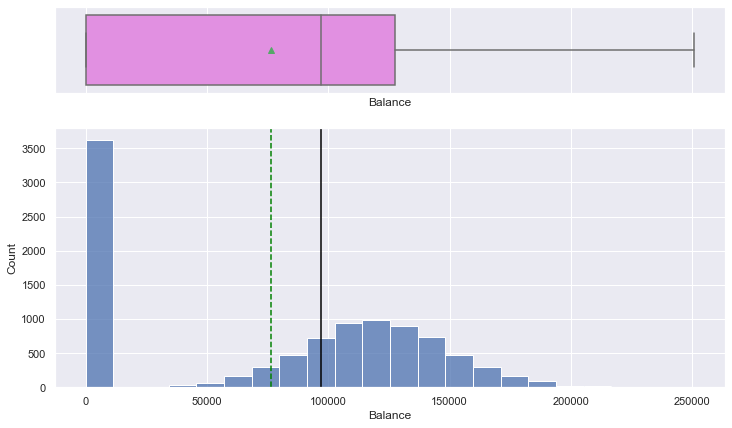

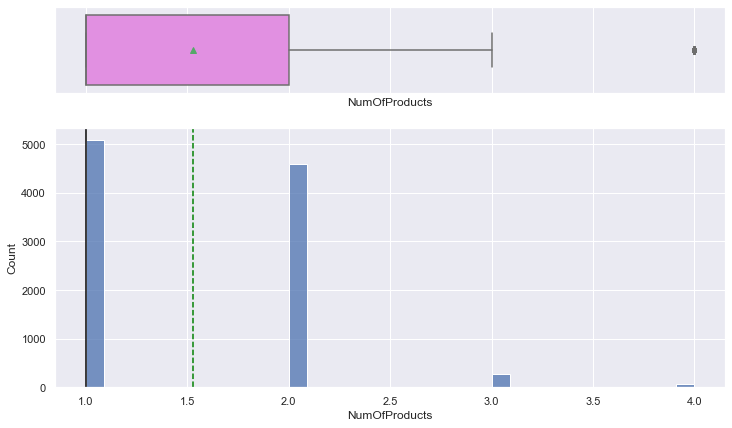

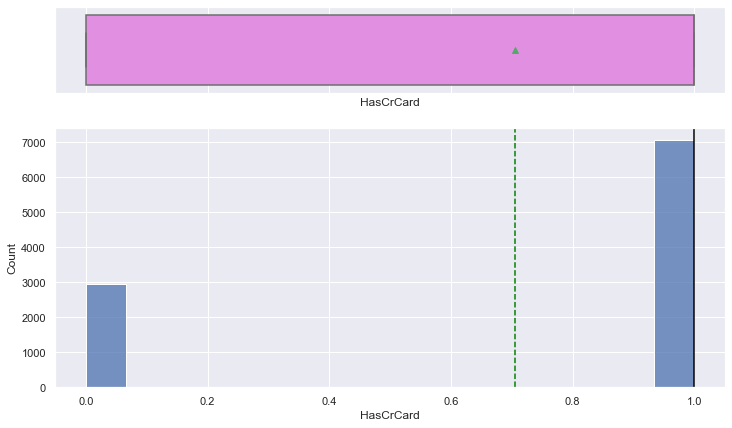

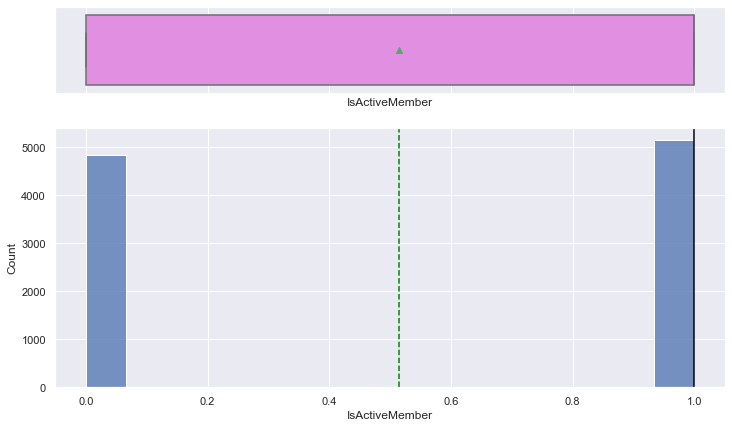

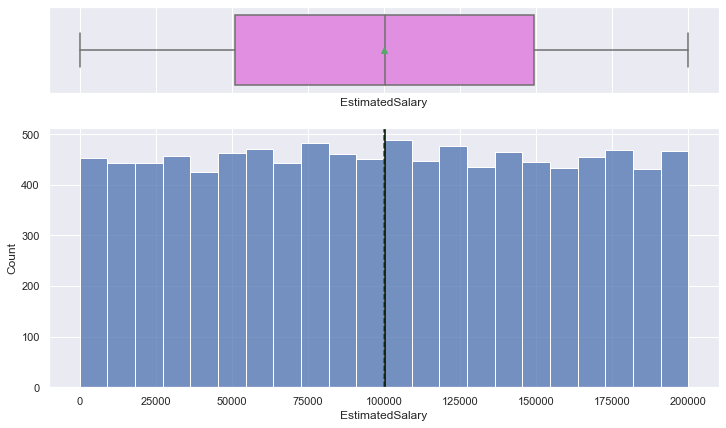

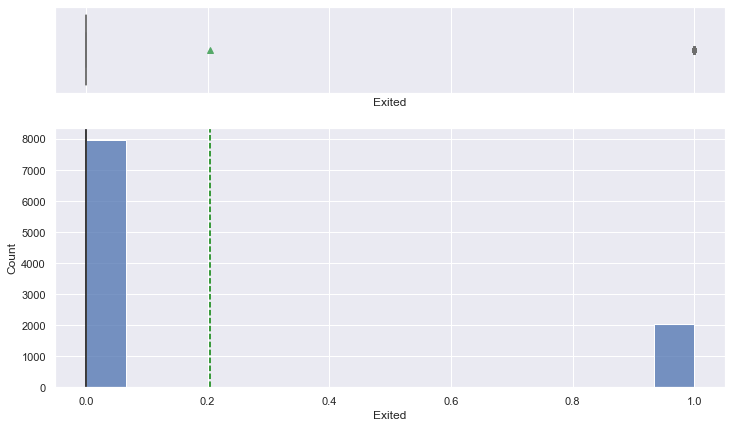

In [16]:
for col in data.columns:
    if data[col].dtypes != 'object':
        histogram_boxplot(data, col)

* CreditScore is very slightly left skewed, but still has the shape of a normal distribution. There are Outliers at the left whisker (customers with the lowest credit score = 350)
* Age is right skewed, with Outliers for customers over 60 years old
* Tenure looks to have a uniform distribution, with the mean at 5
* Balance is left skewed, containing customers with balance of 0
* NumOfProducts is right skewed, with the vast majority at 1, and the least at 4
* 70% of the customers own the credit cards
* Not significant difference among active and non-active customers
* EstimatedSalary is Uniformly distributed, and mean = median at ~ 100K
* Majority 80% of the customers tend to stay loyal to the bank 

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values()
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

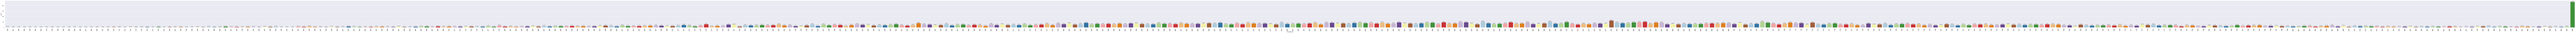

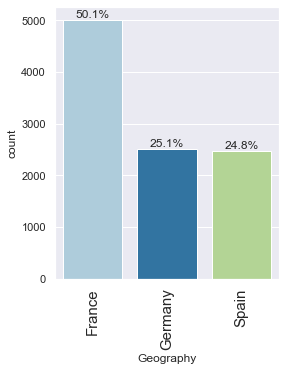

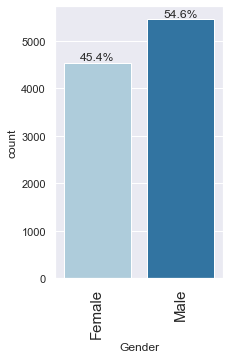

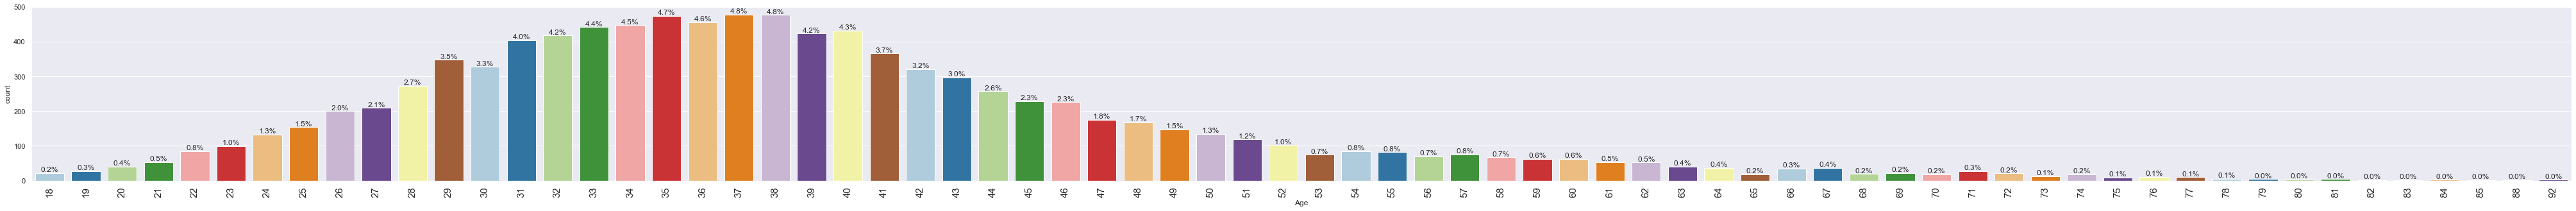

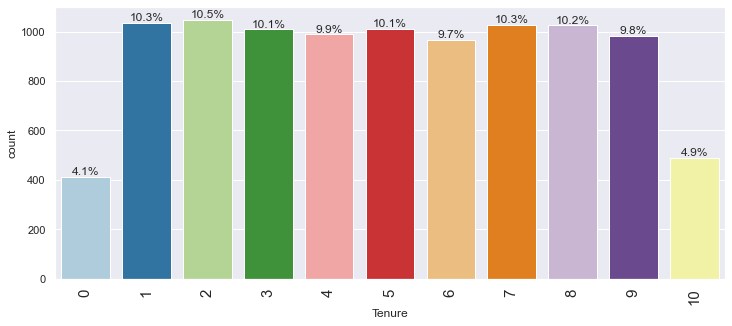

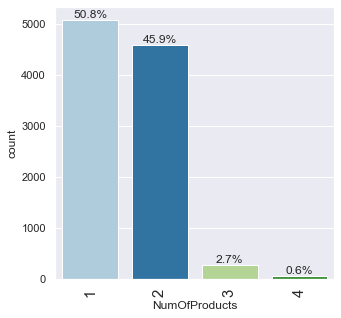

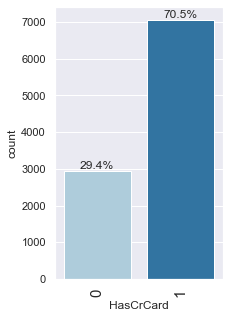

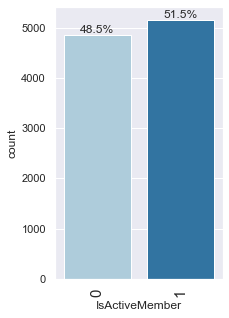

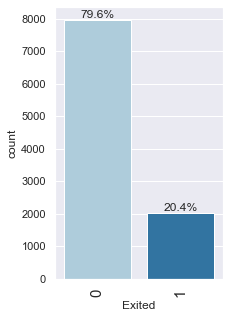

In [18]:
for col in data.columns:
    if col != 'Balance' and col != 'EstimatedSalary':
        labeled_barplot(data, col, perc=True)

* 850 of credit score is the majority among customers => 2.3%, the rest of the customers spread out from 350
* Customers from France is 50%, the rest 0.5 percentiles are divided evenly in Germany and Spain
* The male customers is the majority ~55%, followed by female ~45%
* The majority of customers are in a range of 20 to 60 years old. There are Outliers for customers over 80 years old
* New customers ~4% and the 10 years ~5% of Tenure  are the least in the dataset
* Customers tend to own 1 or 2 number of products, while 3 or 4 is the least
* 70.5% of customers own the credit card from the bank
* ActiveMember customers is the majority ~52%
* Only ~20% of the customers decided to leave the bank, so the dataset is heavily imbalanced

# Bivariate Analysis

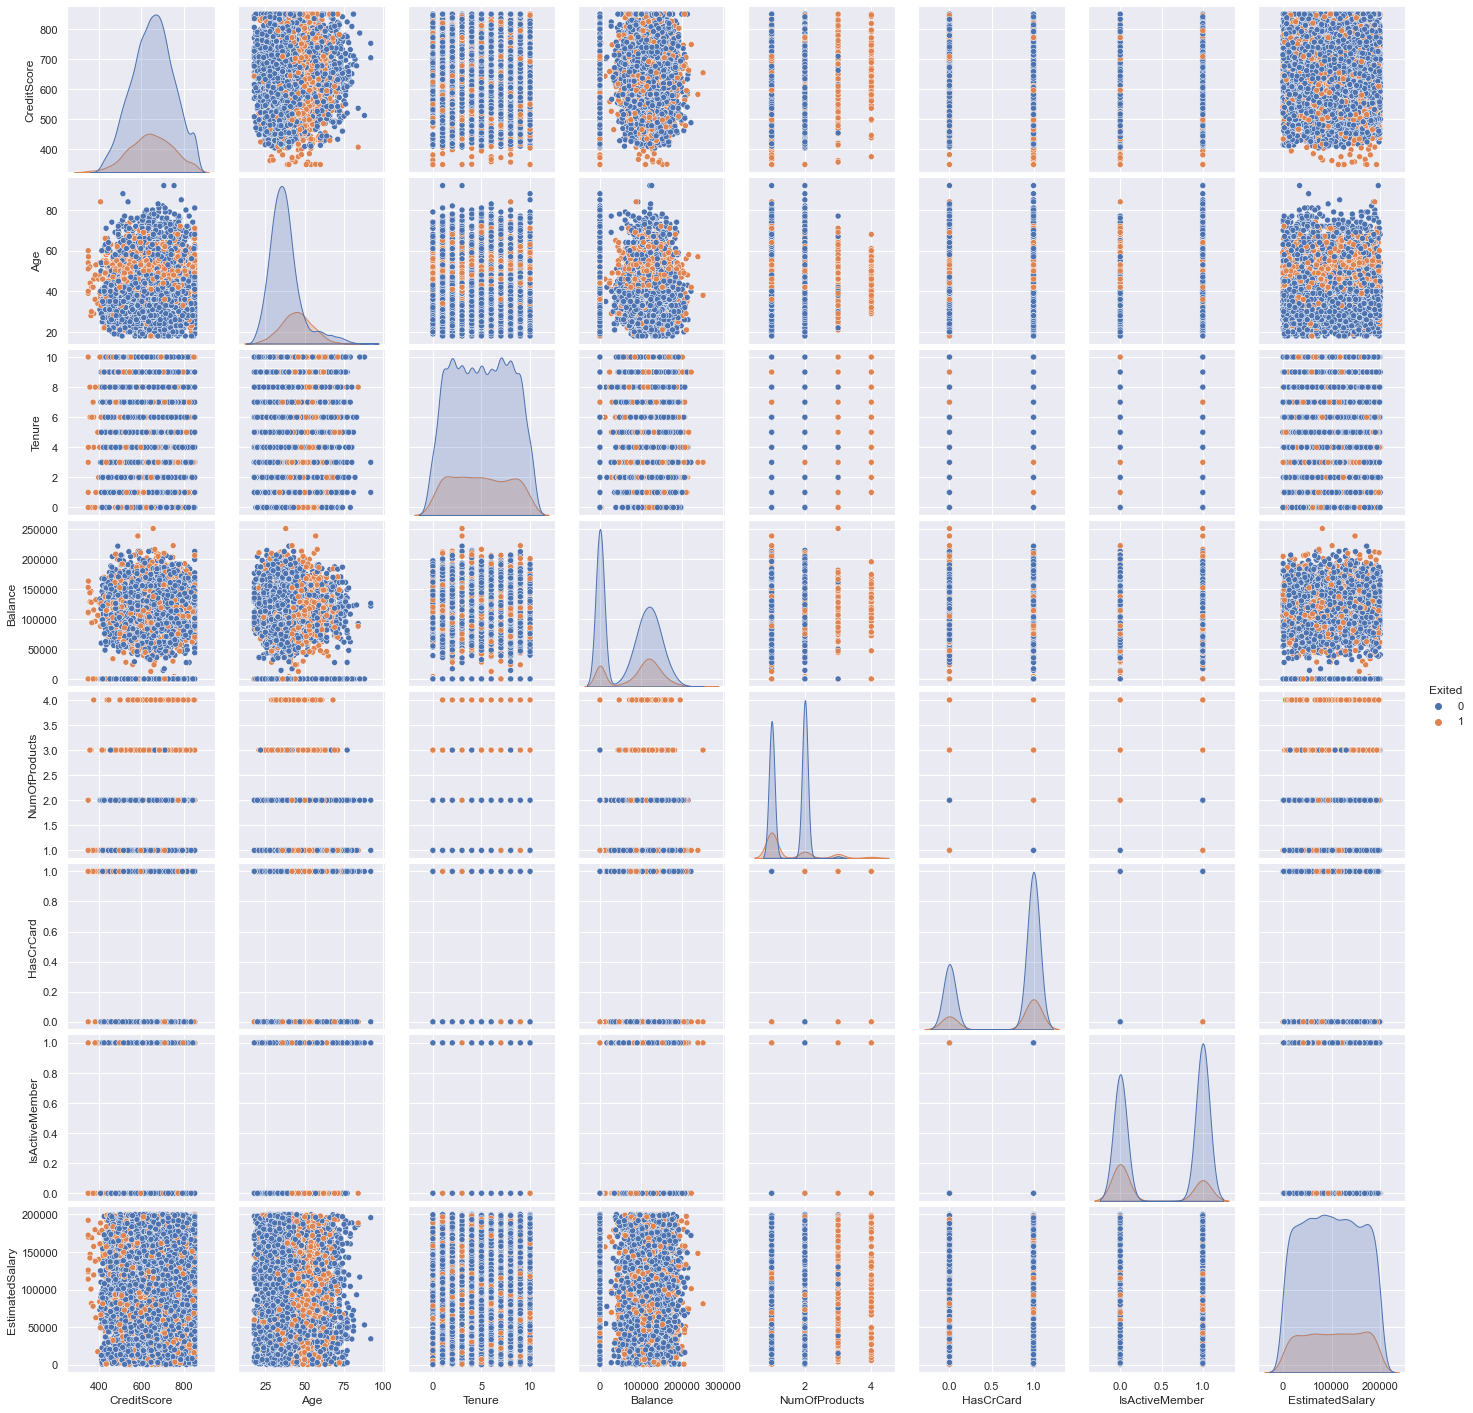

In [19]:
sns.pairplot(data, diag_kind='kde', hue='Exited')
plt.show()

There is no any defined correlations among columns, however based on kde:
* Customers with low credit score tend to exit
* Age between 40 to 60 tend to exit
* Newer customers tend to exit
* Low balance customers tend to exit

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

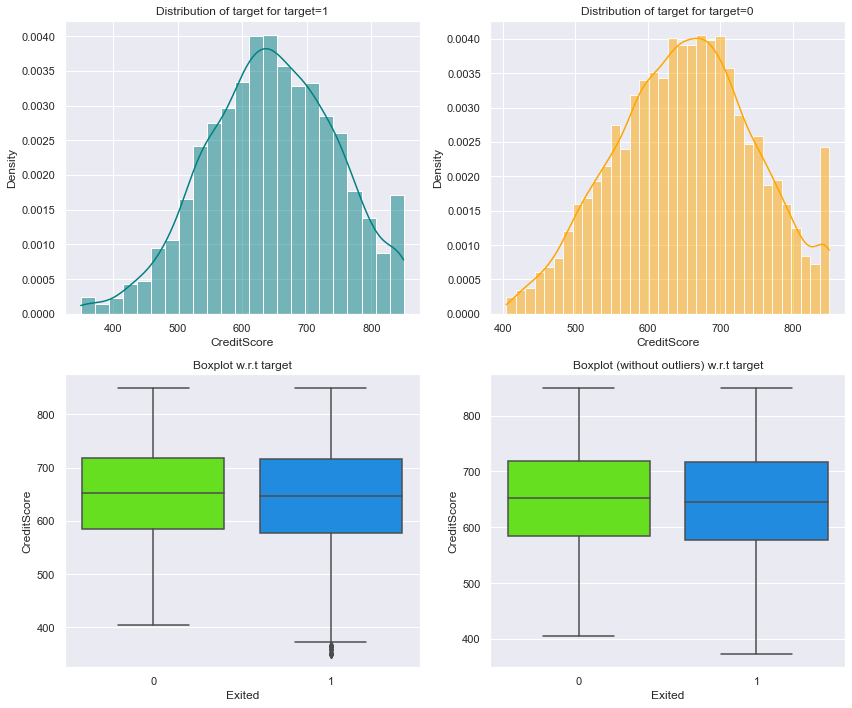

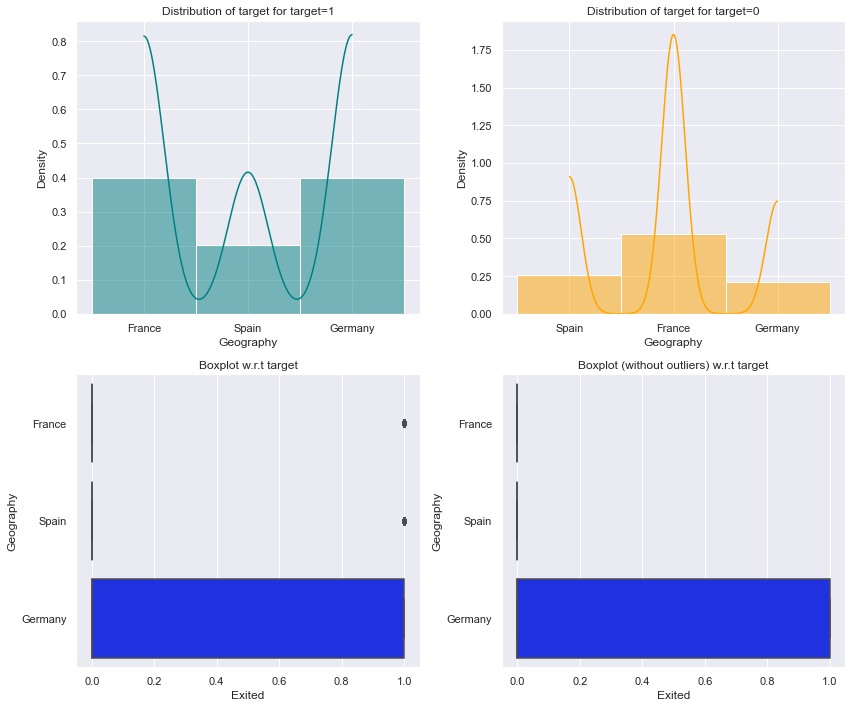

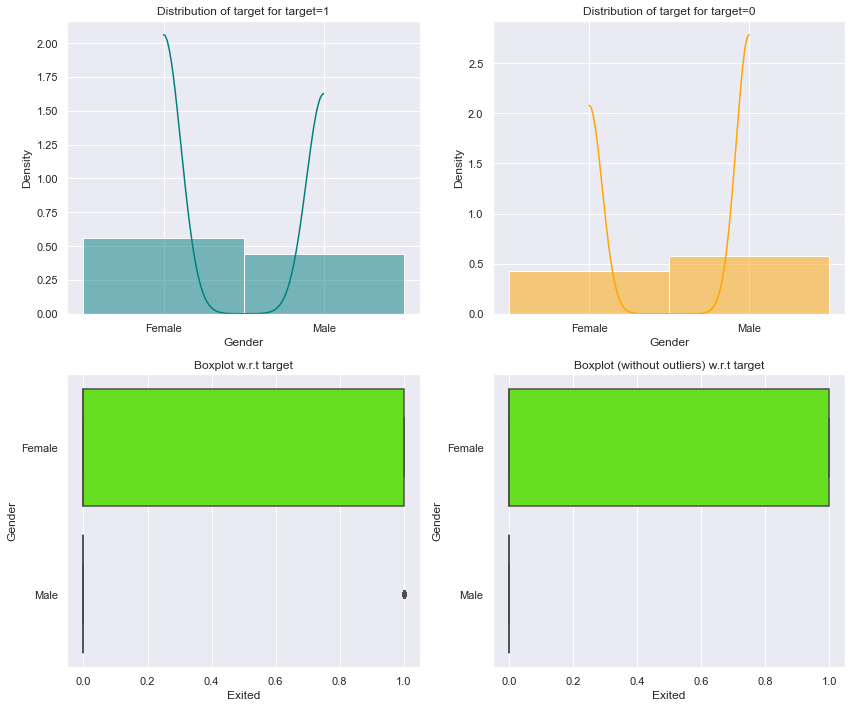

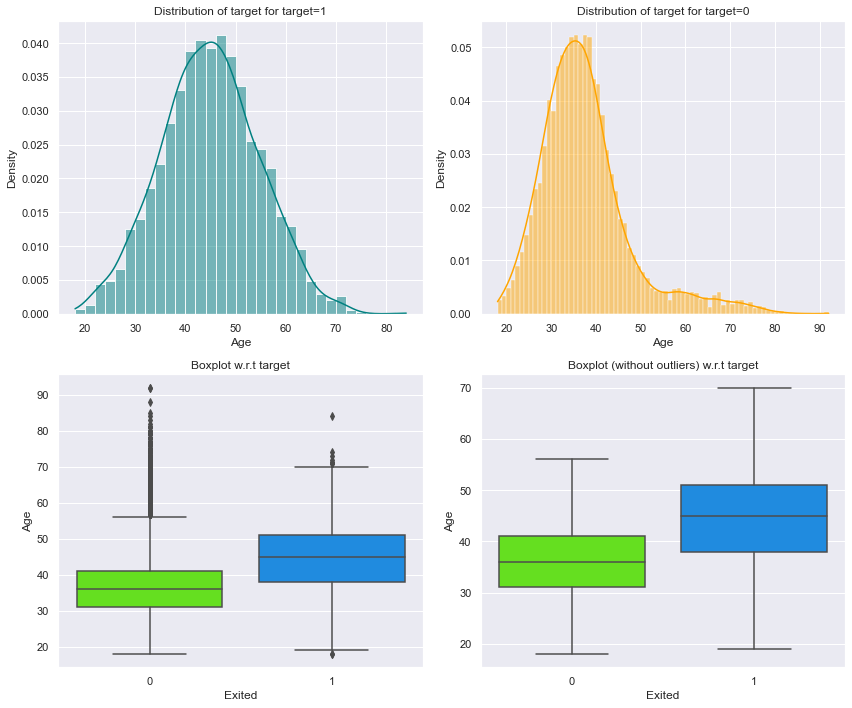

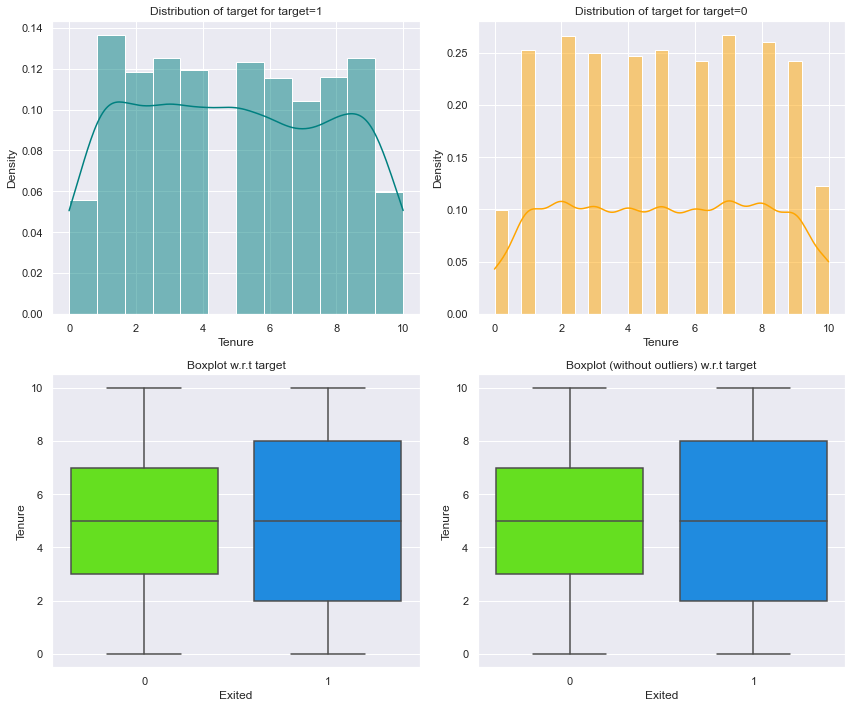

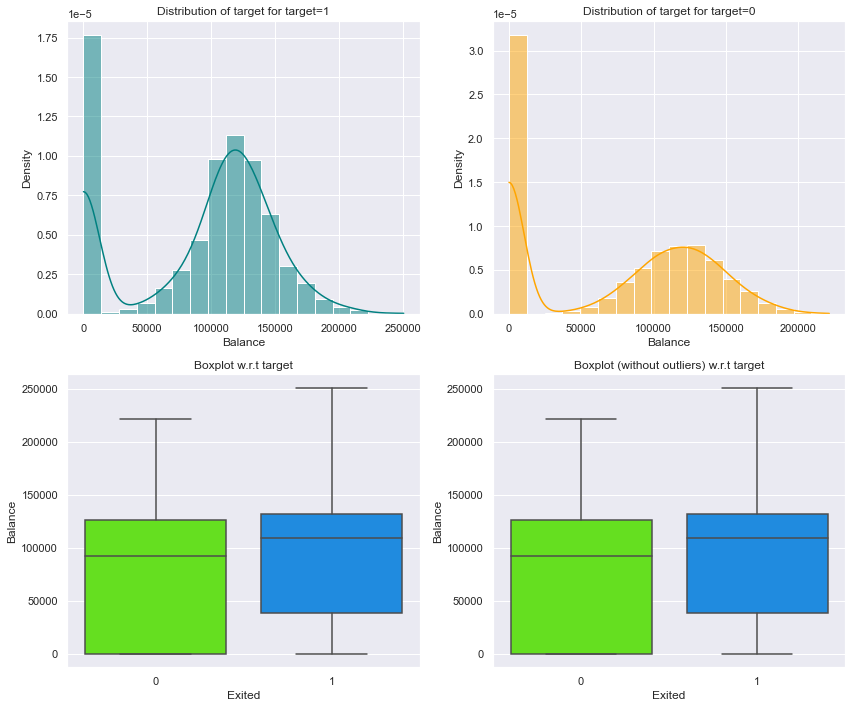

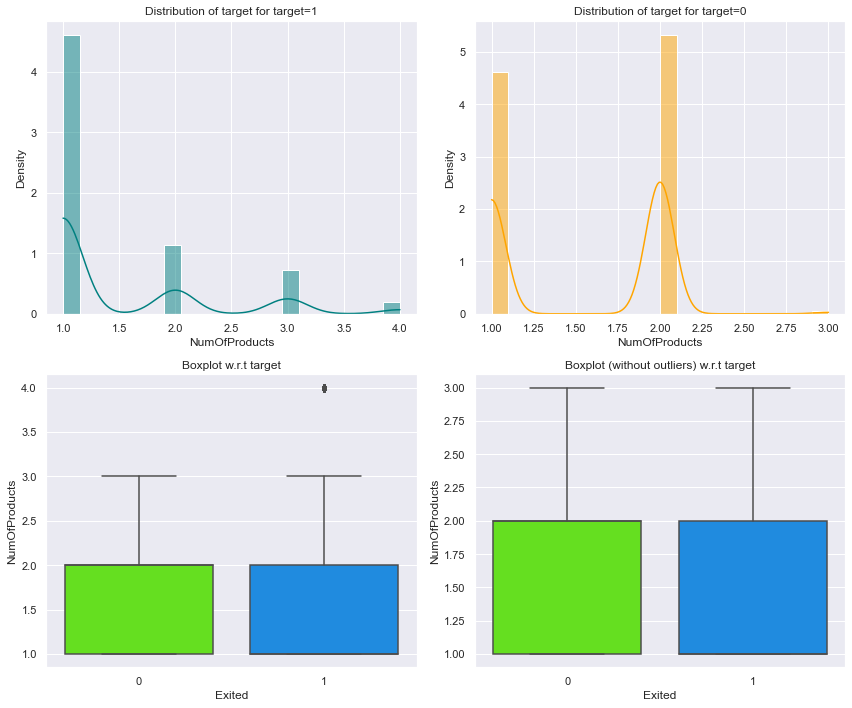

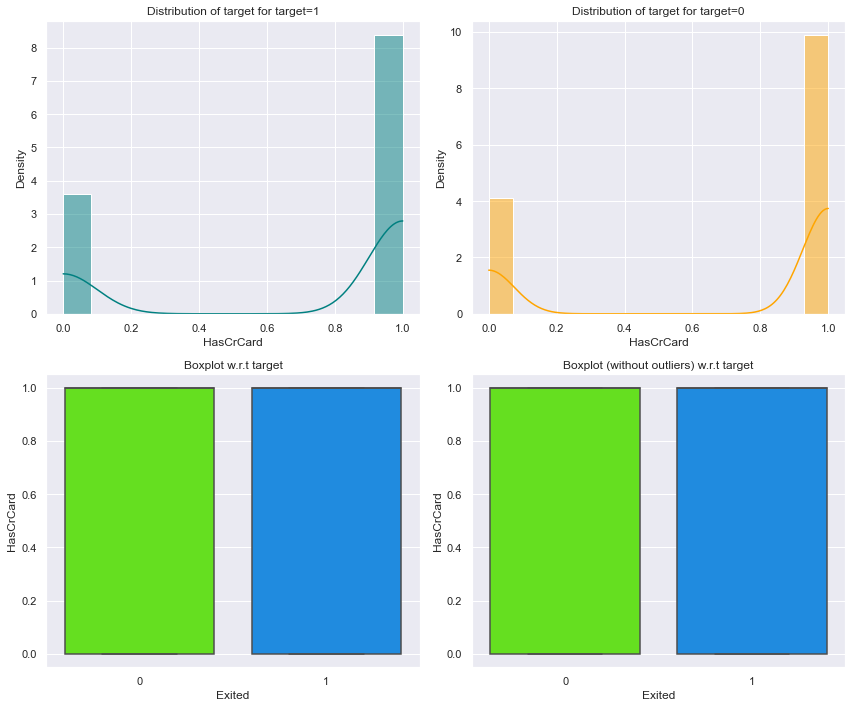

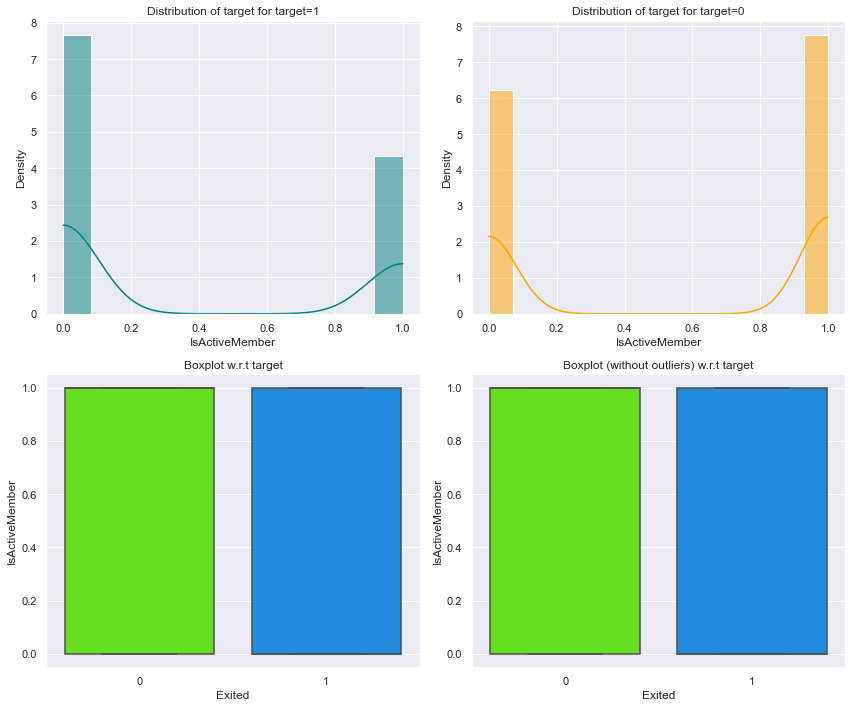

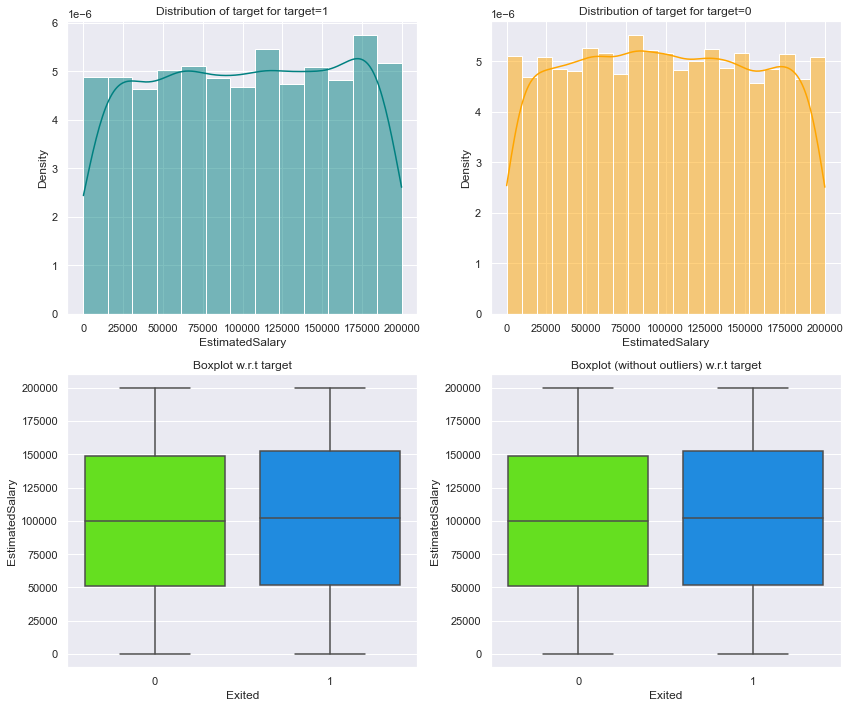

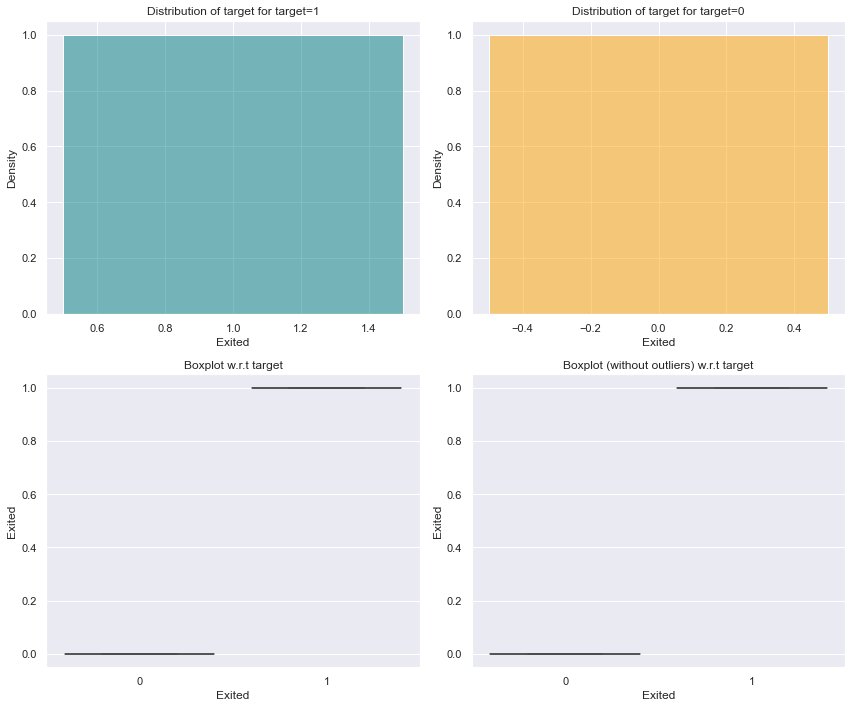

In [21]:
for col in data.columns:
    distribution_plot_wrt_target(data, col, 'Exited')

Observations:
* There is no significant difference on credit score that causes customers to exit the bank. However exited customers are a slight lower credit scores
* Customers from Germany tend to exit more
* Females are the majority to exit the bank 
* Older Customers tend to exit the bank
* Customers quit the bank with a wider range of years using the bank
* Customers with higher Median on Balance exit the bank
* NumberOfProducts, HasCrCard, IsActiveMember doesn't have any impact on exiting the bank
* Customers with a very slightly higher EstimatedSalary tend to quit the bank

In [22]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited          0     1    All
CreditScore                   
All          7963  2037  10000
850           190    43    233
651            33    17     50
705            37    16     53
637            32    14     46
...           ...   ...    ...
810             6     0      6
442             1     0      1
488            10     0     10
814            11     0     11
472             8     0      8

[461 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


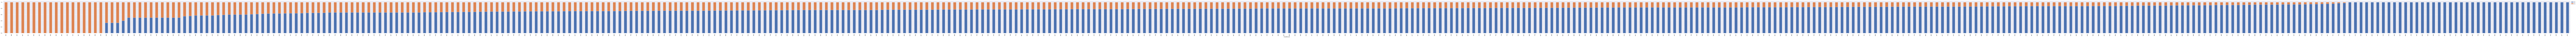

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


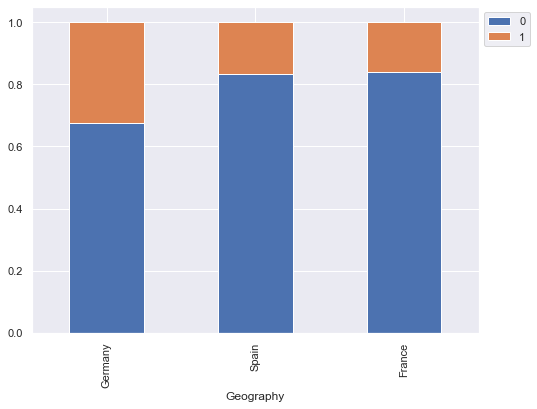

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


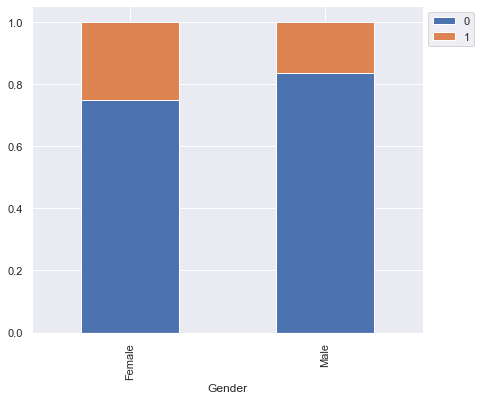

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
48        88    80    168
47        98    77    175
42       244    77    321
49        72    75    147
44       184    73    257
39       351    72    423
50        63    71    134
41       297    69    366
51        53    66    119
52        38    64    102
38       414    63    477
37       416    62    478
35       417    57    474
36       403    53    456
54        33    51     84
56        20    50     70
55        34    48     82
33       398    44    442
53        34    40     74
57        37    38     75
34       414    33    447
31       371    33    404
32       386    32    418
60        30    32     62
59        32    30     62
58        38    29     67
29       320    28    348
30       303    24    327
28       250    23    273
62        31    21     52
61        32    21     53
63        22

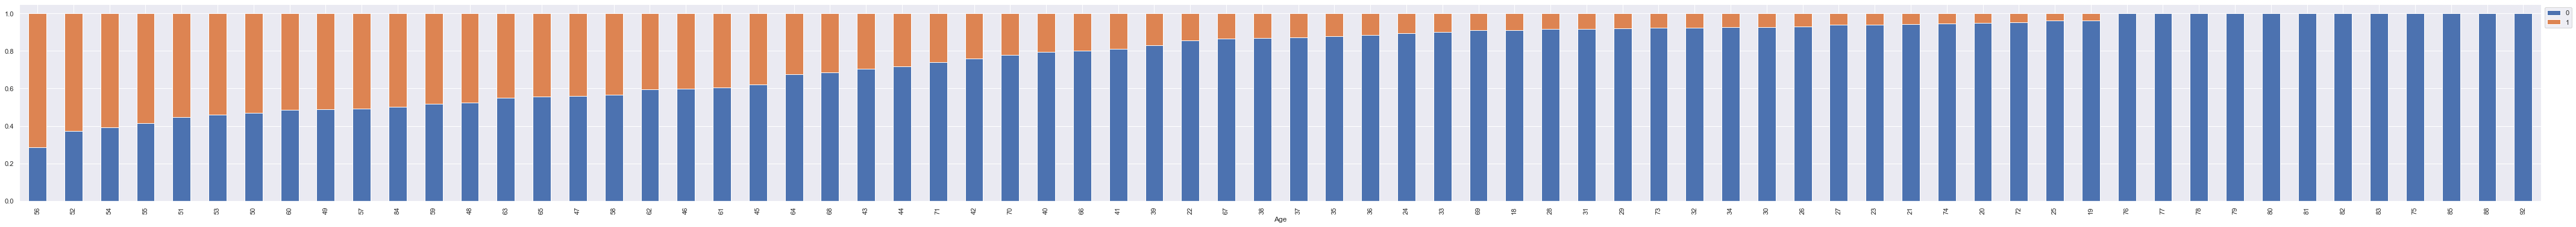

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


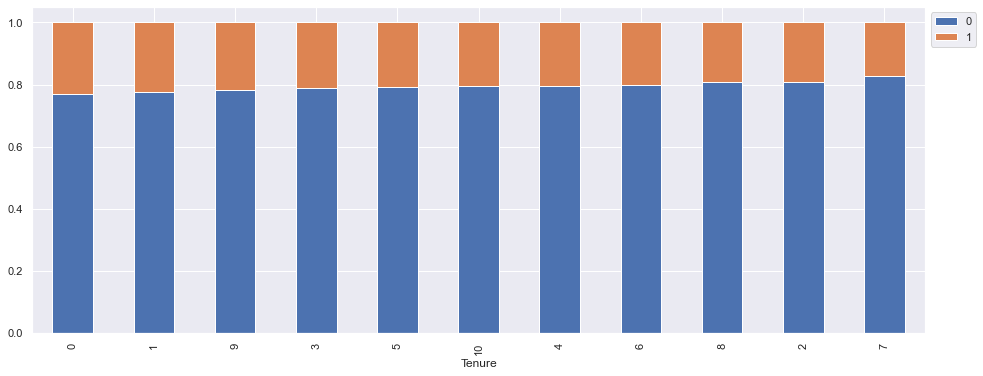

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


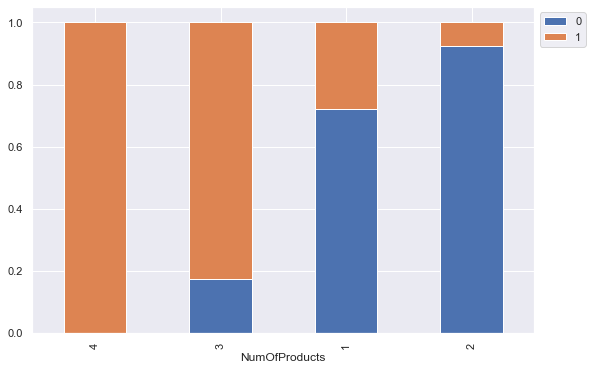

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


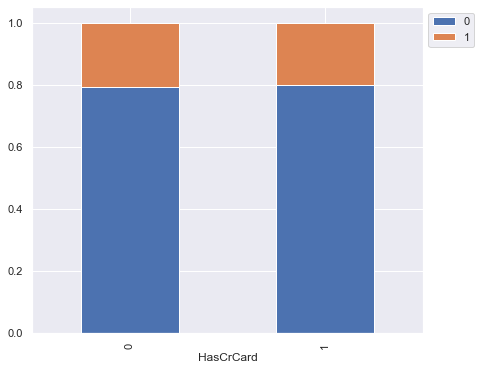

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


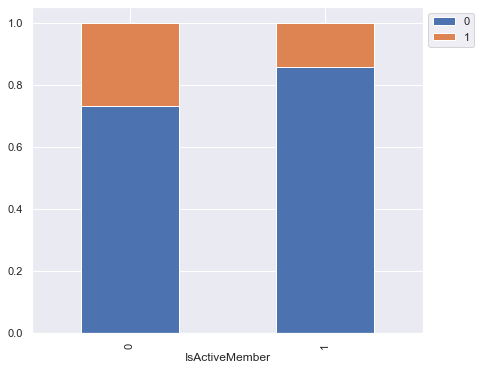

Exited     0     1    All
Exited                   
1          0  2037   2037
All     7963  2037  10000
0       7963     0   7963
------------------------------------------------------------------------------------------------------------------------


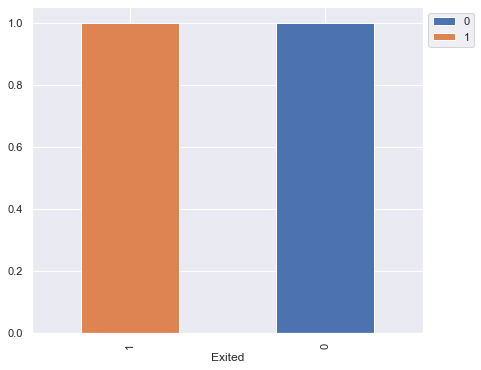

In [23]:
for col in data.columns:
    if col != 'Balance' and col != 'EstimatedSalary':
        stacked_barplot(data, col, 'Exited')

Observations:
* Customers with low credit score tend to quit the bank
* Customers in Germany quit bank the most
* Female customers exit the bank the most
* Elder customers over 40 tend to exit the bank the most
* There is no significant impact on number of Tenure, however new customers has a higher chance on quitting the bank
* Customers with most of the number of products tend to quit the bank 
* HasCrCard column doesn't show any impact 
* Non-activ memberes tend to quit the bank the most

# Data Preparation

## Treating Outliers

In [24]:
def iqr_copping(df, col, factor) :
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3 + (factor * iqr)
    lower_whisker = q1 - (factor * iqr)       
    df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

In [25]:
iqr_copping(data, 'Age', 1.5)
iqr_copping(data, 'CreditScore', 1.5)

## Split of the dataset

In [26]:
#  Separate target variable from independent
X = data.drop('Exited', axis=1)
y = data['Exited']

In [27]:
# normalize the dataset
scaler = StandardScaler()

X['normalized_CreditScore'] = scaler.fit_transform(X['CreditScore'].values.reshape(-1,1))
X['normalized_Age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
X['normalized_Tenure'] = scaler.fit_transform(X['Tenure'].values.reshape(-1,1))
X['normalized_Balance'] = scaler.fit_transform(X['Balance'].values.reshape(-1,1))
X['normalized_NumOfProducts'] = scaler.fit_transform(X['NumOfProducts'].values.reshape(-1,1))
X['normalized_EstimatedSalary'] = scaler.fit_transform(X['EstimatedSalary'].values.reshape(-1,1))

X = X.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'], axis=1)

In [28]:
# Split data into train, val and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(8000, 10) (2000, 10)


In [29]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8000
Number of rows in test data = 2000


In [30]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Model evaluation criterion and Problem Statement

    Businesses like banks that provide service have to worry about the problem of customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

    So the main concern of this problem statement is to identify the False Negative cases as to prevent the loss of the existing customers - main source of the business. We are gonna concentrate on a Recall evaluation metric to improve the service by identifying the causes of those customers to Exit the bank.

In [31]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [32]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [33]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [34]:
#initialize the model
model_1 = Sequential()
# This adds the input layer
model_1.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
# hidden layer 1
model_1.add(Dense(128, activation='relu'))
# hidden layer 2
model_1.add(Dense(64, activation='relu'))
# hidden layer 3
model_1.add(Dense(32, activation='relu'))
# Output Layer
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1, activation='sigmoid'))

In [35]:
# Create optimizer with default learning rate
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [36]:
# get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


There is a total of 46, 337 parameters within this model

In [37]:
history_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=15, verbose = 2)

Epoch 1/20
427/427 - 1s - loss: 0.5017 - accuracy: 0.7931 - val_loss: 0.4592 - val_accuracy: 0.7906 - 902ms/epoch - 2ms/step
Epoch 2/20
427/427 - 0s - loss: 0.4305 - accuracy: 0.8044 - val_loss: 0.4224 - val_accuracy: 0.8075 - 437ms/epoch - 1ms/step
Epoch 3/20
427/427 - 0s - loss: 0.4024 - accuracy: 0.8238 - val_loss: 0.3977 - val_accuracy: 0.8306 - 419ms/epoch - 981us/step
Epoch 4/20
427/427 - 0s - loss: 0.3794 - accuracy: 0.8392 - val_loss: 0.3752 - val_accuracy: 0.8456 - 440ms/epoch - 1ms/step
Epoch 5/20
427/427 - 0s - loss: 0.3627 - accuracy: 0.8475 - val_loss: 0.3660 - val_accuracy: 0.8469 - 422ms/epoch - 989us/step
Epoch 6/20
427/427 - 0s - loss: 0.3522 - accuracy: 0.8534 - val_loss: 0.3622 - val_accuracy: 0.8506 - 450ms/epoch - 1ms/step
Epoch 7/20
427/427 - 0s - loss: 0.3454 - accuracy: 0.8555 - val_loss: 0.3518 - val_accuracy: 0.8550 - 451ms/epoch - 1ms/step
Epoch 8/20
427/427 - 0s - loss: 0.3410 - accuracy: 0.8603 - val_loss: 0.3561 - val_accuracy: 0.8500 - 453ms/epoch - 1ms/s

Plotting the train and test loss

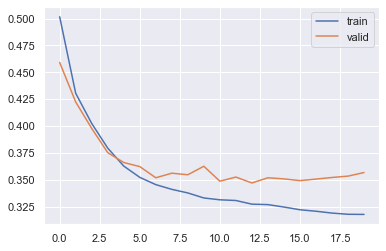

In [38]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

Loss function is getting lowered, however there is a sign of overfit

### Evaluation

In [39]:
score_1 = model_1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 984us/step - loss: 0.3641 - accuracy: 0.8600


Accuracy score of ~86%

### Let's Print confusion matrix

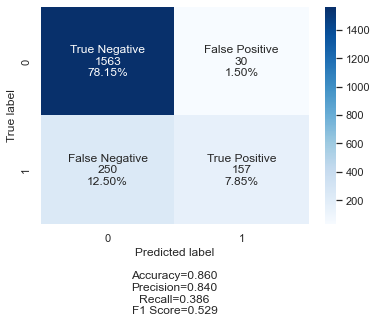

In [40]:
## Confusion Matrix on unsee test set
y_pred1 = model_1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Accuracy and Precision are within the same range. It's obvious the Recall is very low with 12.5% of False negative cases, so we need to fix that. First let's find the appropriate Threashold using AUC curve:

Best Threshold=0.119164, G-Mean=0.767


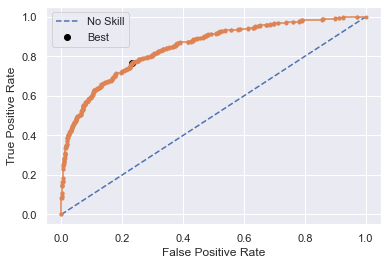

In [41]:
# predict probabilities
yhat1 = model_1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The new appropriate Threshold is 0.119164, G-Mean=0.767. Let's evaluate it

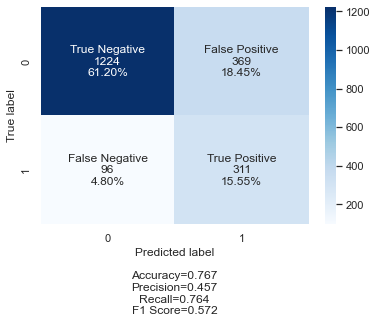

In [42]:
## Confusion Matrix on unseen test set
y_pred1 = model_1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Accuracy score went down to 77%, however Recall is in a good recovery of 76%. Promising results.

### Model_2 with initialization and Batch Normalization with DropOut

In [43]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [44]:
#initialize the model
model_2 = Sequential()
# This adds the input layer
model_2.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_shape=(X_train.shape[1],)))
# hidden layer 1
model_2.add(Dense(128, kernel_initializer='random_normal', activation='relu'))
# Use Batch Normalization
model_2.add(BatchNormalization())
# hidden layer 2
model_2.add(Dense(64, kernel_initializer='random_normal', activation='relu'))
model_2.add(BatchNormalization())
# Add a Dropout
model_2.add(Dropout(0.5))
# hidden layer 3
model_2.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model_2.add(BatchNormalization())
# Output Layer
# We use the sigmoid because we want probability outcomes
model_2.add(Dense(1, activation='sigmoid'))

In [45]:
# Create optimizer with SGD
# Compile the model
model_2.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [46]:
history_2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=15, verbose = 2)

Epoch 1/15
427/427 - 1s - loss: 0.4954 - accuracy: 0.7697 - val_loss: 0.4186 - val_accuracy: 0.8119 - 1s/epoch - 3ms/step
Epoch 2/15
427/427 - 1s - loss: 0.4027 - accuracy: 0.8286 - val_loss: 0.3696 - val_accuracy: 0.8500 - 572ms/epoch - 1ms/step
Epoch 3/15
427/427 - 1s - loss: 0.3844 - accuracy: 0.8384 - val_loss: 0.3562 - val_accuracy: 0.8544 - 549ms/epoch - 1ms/step
Epoch 4/15
427/427 - 1s - loss: 0.3735 - accuracy: 0.8411 - val_loss: 0.3544 - val_accuracy: 0.8512 - 534ms/epoch - 1ms/step
Epoch 5/15
427/427 - 1s - loss: 0.3723 - accuracy: 0.8461 - val_loss: 0.3588 - val_accuracy: 0.8512 - 539ms/epoch - 1ms/step
Epoch 6/15
427/427 - 1s - loss: 0.3690 - accuracy: 0.8458 - val_loss: 0.3544 - val_accuracy: 0.8556 - 553ms/epoch - 1ms/step
Epoch 7/15
427/427 - 1s - loss: 0.3605 - accuracy: 0.8497 - val_loss: 0.3466 - val_accuracy: 0.8531 - 535ms/epoch - 1ms/step
Epoch 8/15
427/427 - 1s - loss: 0.3637 - accuracy: 0.8492 - val_loss: 0.3520 - val_accuracy: 0.8544 - 554ms/epoch - 1ms/step
Epo

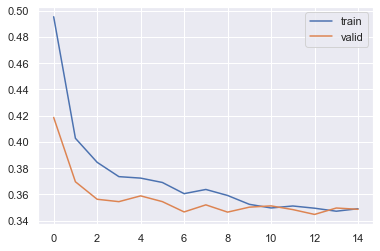

In [47]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The overfit has been fixed.

Evaluation

In [48]:
score_2 = model_2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8640


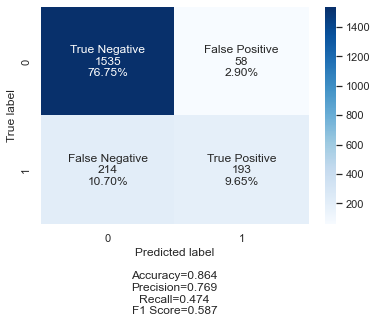

In [49]:
## Confusion Matrix on unsee test set
y_pred1 = model_2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Model 2 has improvement on a Recall, however it's still pretty low. Let's find the best threshold using AUC-ROC curve:

Best Threshold=0.207760, G-Mean=0.760


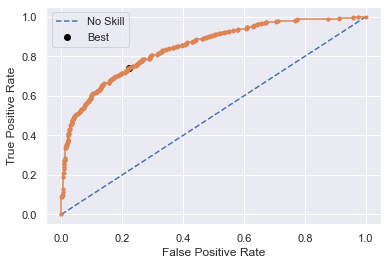

In [50]:
# predict probabilities
yhat1 = model_2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

A new threshold is 0.21 

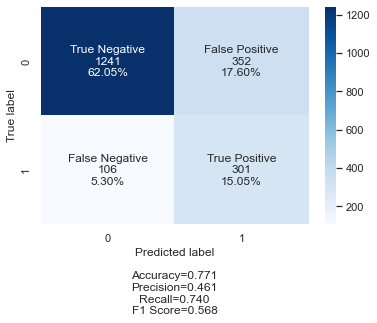

In [51]:
## Confusion Matrix on unseen test set
y_pred1 = model_2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Now we have a Recall of 74% and Accuracy of 77%. Let's try class_weights since target var is imbalanced

### Model_3 with classweights

In [52]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [53]:
#initialize the model
model_3 = Sequential()
# This adds the input layer
model_3.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_shape=(X_train.shape[1],)))
# hidden layer 1
model_3.add(Dense(128, kernel_initializer='random_normal', activation='relu'))
# Use Batch Normalization
model_3.add(BatchNormalization())
# hidden layer 2
model_3.add(Dense(64, kernel_initializer='random_normal', activation='relu'))
model_3.add(BatchNormalization())
# Add a Dropout
model_3.add(Dropout(0.5))
# hidden layer 3
model_3.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model_3.add(BatchNormalization())
# Output Layer
# We use the sigmoid because we want probability outcomes
model_3.add(Dense(1, activation='sigmoid'))

In [54]:
# Create optimizer with SGD
# Compile the model
model_3.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [55]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(y_train), y=np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [56]:
history_3 = model_3.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=15, verbose = 2, class_weight=class_weights)

Epoch 1/15
427/427 - 1s - loss: 0.5942 - accuracy: 0.6736 - val_loss: 0.4677 - val_accuracy: 0.8206 - 1s/epoch - 3ms/step
Epoch 2/15
427/427 - 1s - loss: 0.5327 - accuracy: 0.7377 - val_loss: 0.4722 - val_accuracy: 0.7775 - 663ms/epoch - 2ms/step
Epoch 3/15
427/427 - 1s - loss: 0.5074 - accuracy: 0.7478 - val_loss: 0.4809 - val_accuracy: 0.7731 - 593ms/epoch - 1ms/step
Epoch 4/15
427/427 - 1s - loss: 0.4948 - accuracy: 0.7545 - val_loss: 0.4602 - val_accuracy: 0.7925 - 593ms/epoch - 1ms/step
Epoch 5/15
427/427 - 1s - loss: 0.4999 - accuracy: 0.7539 - val_loss: 0.4339 - val_accuracy: 0.8106 - 593ms/epoch - 1ms/step
Epoch 6/15
427/427 - 1s - loss: 0.4981 - accuracy: 0.7692 - val_loss: 0.4583 - val_accuracy: 0.8031 - 581ms/epoch - 1ms/step
Epoch 7/15
427/427 - 1s - loss: 0.4850 - accuracy: 0.7684 - val_loss: 0.4505 - val_accuracy: 0.7975 - 607ms/epoch - 1ms/step
Epoch 8/15
427/427 - 1s - loss: 0.4888 - accuracy: 0.7675 - val_loss: 0.4256 - val_accuracy: 0.8125 - 598ms/epoch - 1ms/step
Epo

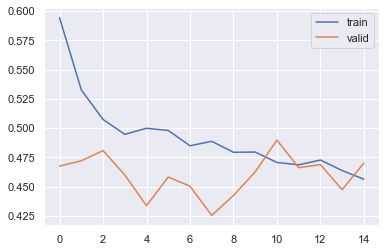

In [57]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [58]:
score_3 = model_3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7680


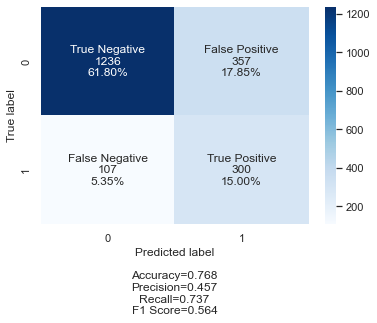

In [59]:
## Confusion Matrix on unsee test set
y_pred1 = model_3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The Recall went up to ~74%, with Flase Negative of 5.4%

Best Threshold=0.551165, G-Mean=0.764


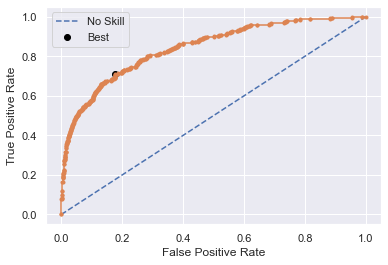

In [60]:
# predict probabilities
yhat1 = model_3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

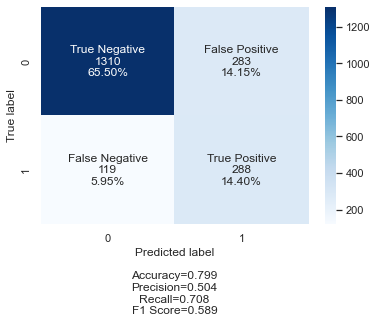

In [61]:
## Confusion Matrix on unseen test set
y_pred1 = model_3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The Recall didn't improve, with a new threshold, let's try something else


### Model_4 with Adam optimizer and defined Learning_rate

In [62]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [63]:
#initialize the model
model_4 = Sequential()
# This adds the input layer
model_4.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_shape=(X_train.shape[1],)))
# hidden layer 1
model_4.add(Dense(128, kernel_initializer='random_normal', activation='relu'))
# Use Batch Normalization
model_4.add(BatchNormalization())
# hidden layer 2
model_4.add(Dense(64, kernel_initializer='random_normal', activation='relu'))
model_4.add(BatchNormalization())
# Add a Dropout
model_4.add(Dropout(0.5))
# hidden layer 3
model_4.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model_4.add(BatchNormalization())
# Output Layer
# We use the sigmoid because we want probability outcomes
model_4.add(Dense(1, activation='sigmoid'))

In [64]:
# Create optimizer with Adam
# Compile the model
model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [65]:
history_4 = model_4.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=15, verbose = 2, class_weight=class_weights)

Epoch 1/15
427/427 - 2s - loss: 0.6026 - accuracy: 0.6836 - val_loss: 0.4923 - val_accuracy: 0.7894 - 2s/epoch - 4ms/step
Epoch 2/15
427/427 - 1s - loss: 0.5308 - accuracy: 0.7500 - val_loss: 0.4997 - val_accuracy: 0.7713 - 701ms/epoch - 2ms/step
Epoch 3/15
427/427 - 1s - loss: 0.5163 - accuracy: 0.7486 - val_loss: 0.5081 - val_accuracy: 0.7569 - 692ms/epoch - 2ms/step
Epoch 4/15
427/427 - 1s - loss: 0.5005 - accuracy: 0.7613 - val_loss: 0.4632 - val_accuracy: 0.7850 - 663ms/epoch - 2ms/step
Epoch 5/15
427/427 - 1s - loss: 0.4998 - accuracy: 0.7570 - val_loss: 0.4312 - val_accuracy: 0.8112 - 730ms/epoch - 2ms/step
Epoch 6/15
427/427 - 1s - loss: 0.4934 - accuracy: 0.7667 - val_loss: 0.4961 - val_accuracy: 0.7575 - 681ms/epoch - 2ms/step
Epoch 7/15
427/427 - 1s - loss: 0.4892 - accuracy: 0.7623 - val_loss: 0.4535 - val_accuracy: 0.7831 - 674ms/epoch - 2ms/step
Epoch 8/15
427/427 - 1s - loss: 0.4911 - accuracy: 0.7628 - val_loss: 0.4574 - val_accuracy: 0.7900 - 695ms/epoch - 2ms/step
Epo

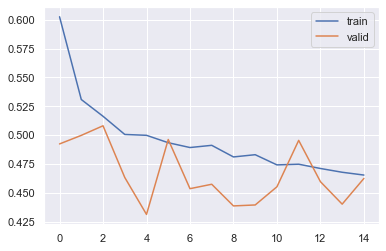

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [67]:
score_4 = model_4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7755


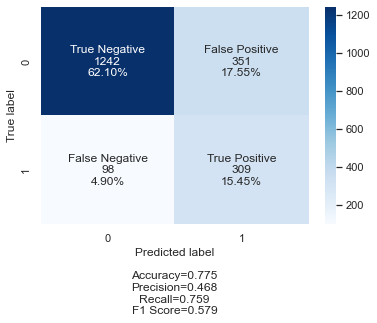

In [68]:
## Confusion Matrix on unsee test set
y_pred1 = model_4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The Recall improved very slightly, however Loss function is not smooth on validation dataset. Let's find the best Threshold:

Best Threshold=0.504141, G-Mean=0.772


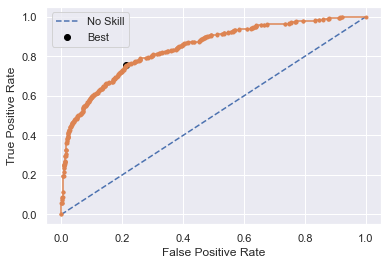

In [69]:
# predict probabilities
yhat1 = model_4.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Looks as Threshold of 0.5 is correct.

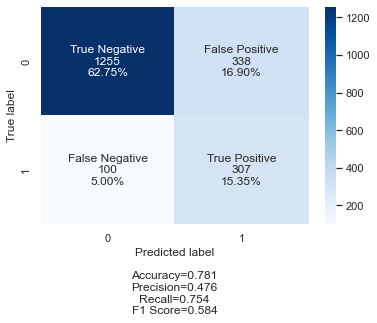

In [70]:
## Confusion Matrix on unseen test set
y_pred1 = model_4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



### Model_5 with Early stopping and SGD Optimizer with defined Learning rate

In [72]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [73]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
 
                             verbose=0, mode='min', restore_best_weights= True)


#initialize the model
model_5 = Sequential()
# This adds the input layer
model_5.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_shape=(X_train.shape[1],)))
# hidden layer 1
model_5.add(Dense(128, kernel_initializer='random_normal', activation='relu'))
# Use Batch Normalization
model_5.add(BatchNormalization())
# hidden layer 2
model_5.add(Dense(64, kernel_initializer='random_normal', activation='relu'))
model_5.add(BatchNormalization())
# Add a Dropout
model_5.add(Dropout(0.5))
# hidden layer 3
model_5.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model_5.add(BatchNormalization())
# Output Layer
# We use the sigmoid because we want probability outcomes
model_5.add(Dense(1, activation='sigmoid'))

In [74]:
# Create optimizer with SGD
# Compile the model
model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [75]:
history_5 = model_5.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose = 2, callbacks=[es])

Epoch 1/50
200/200 - 1s - loss: 0.7192 - accuracy: 0.5930 - val_loss: 0.6157 - val_accuracy: 0.7906 - 904ms/epoch - 5ms/step
Epoch 2/50
200/200 - 0s - loss: 0.6198 - accuracy: 0.6717 - val_loss: 0.5413 - val_accuracy: 0.8306 - 309ms/epoch - 2ms/step
Epoch 3/50
200/200 - 0s - loss: 0.5674 - accuracy: 0.7211 - val_loss: 0.4825 - val_accuracy: 0.8244 - 330ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 0.5294 - accuracy: 0.7564 - val_loss: 0.4653 - val_accuracy: 0.8144 - 341ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 0.4990 - accuracy: 0.7759 - val_loss: 0.4511 - val_accuracy: 0.8213 - 336ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 0.4781 - accuracy: 0.7898 - val_loss: 0.4282 - val_accuracy: 0.8344 - 339ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 0.4576 - accuracy: 0.8087 - val_loss: 0.4152 - val_accuracy: 0.8313 - 334ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 0.4512 - accuracy: 0.8102 - val_loss: 0.4036 - val_accuracy: 0.8375 - 333ms/epoch - 2ms/step


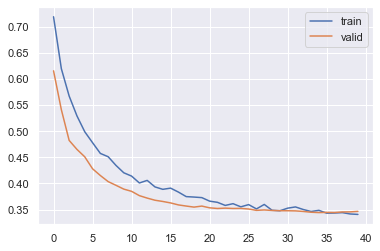

In [76]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_5.history)
hist['epoch'] = history_5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The Loss function is pretty smooth on train and Validation datasets.

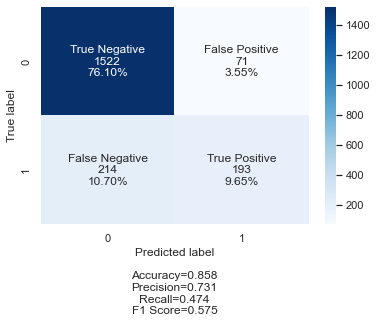

In [77]:
## Confusion Matrix on unsee test set
y_pred1 = model_5.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Unfortunately, the Recall is pretty low here, with ~11% of False Negative cases. Let's find the best threshold:

Best Threshold=0.165428, G-Mean=0.765


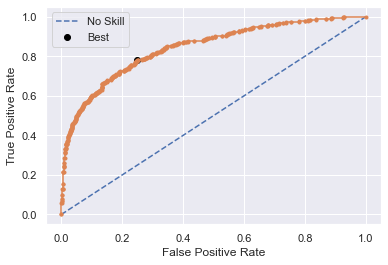

In [78]:
# predict probabilities
yhat1 = model_5.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

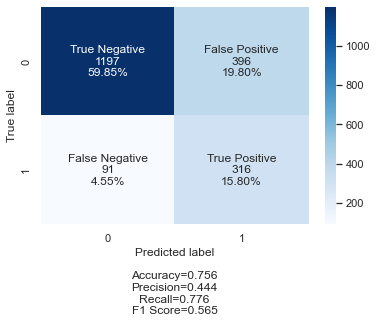

In [79]:
## Confusion Matrix on unseen test set
y_pred1 = model_5.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

In [80]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.44      0.78      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



With a new Threshold of 0.16 => the Recall is up to 0.78 and Loss function is smooth between train and validation datasets.

### Model_6 with Keras Tuner

In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [82]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [83]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [84]:
# Initialize a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project .\Job_\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


In [85]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [86]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [87]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.859583338101705
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8581250111262003
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8568750023841858
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8556249936421713
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
unit

### Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [88]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [89]:
model_6 = Sequential()
model_6.add(Dense(64,activation='relu',kernel_initializer='random_uniform',input_dim = X_train.shape[1]))
# Use Batch Normalization
model_6.add(BatchNormalization())
model_6.add(Dense(96,activation='relu',kernel_initializer='random_uniform'))
# Use Batch Normalization
model_6.add(BatchNormalization())
model_6.add(Dense(96,activation='relu',kernel_initializer='random_uniform'))
# Use Batch Normalization
model_6.add(BatchNormalization())
model_6.add(Dense(224,activation='relu',kernel_initializer='random_uniform'))
# Use Batch Normalization
model_6.add(BatchNormalization())
model_6.add(Dropout(0.2))
model_6.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))
model_6.add(Dense(1, activation = 'sigmoid'))

In [90]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 96)                6240      
                                                                 
 batch_normalization_1 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 batch_normalization_2 (Batc  (None, 96)               3

In [91]:
optimizer = tf.keras.optimizers.SGD(0.001)
model_6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [92]:
history_6 = model_6.fit(X_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split = 0.2)

Epoch 1/15
200/200 [==============================] - 1s 3ms/step - loss: 0.5472 - accuracy: 0.7755 - val_loss: 0.6099 - val_accuracy: 0.7906
Epoch 2/15
200/200 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8255 - val_loss: 0.5229 - val_accuracy: 0.7906
Epoch 3/15
200/200 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8372 - val_loss: 0.4080 - val_accuracy: 0.8444
Epoch 4/15
200/200 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.8495 - val_loss: 0.3629 - val_accuracy: 0.8556
Epoch 5/15
200/200 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.8477 - val_loss: 0.3521 - val_accuracy: 0.8612
Epoch 6/15
200/200 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8506 - val_loss: 0.3489 - val_accuracy: 0.8562
Epoch 7/15
200/200 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8537 - val_loss: 0.3459 - val_accuracy: 0.8581
Epoch 

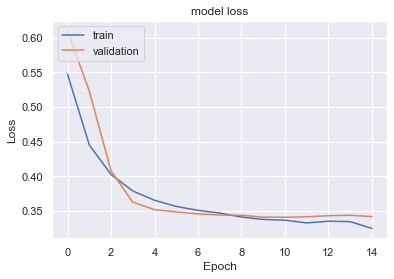

In [93]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

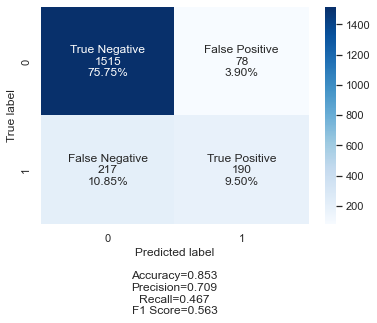

In [94]:
## Confusion Matrix on unsee test set
y_pred1 = model_6.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Best Threshold=0.230278, G-Mean=0.756


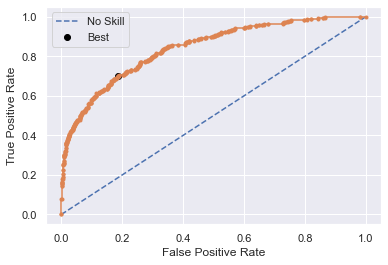

In [95]:
# predict probabilities
yhat1 = model_6.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

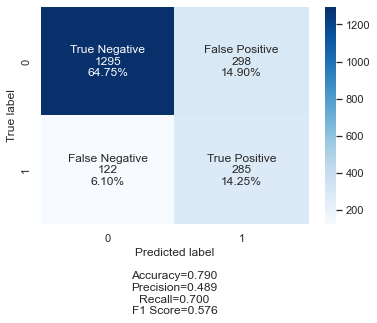

In [96]:
## Confusion Matrix on unseen test set
y_pred1 = model_6.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The Recall is 70% with False Negative cases of 6.10%. Not bad but we had a better results.

Let's try to apply SMOTE to balance this dataset and then apply hyperparameter tuning accordingly.

### SMOTE + Keras Tuner

In [97]:
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [98]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [99]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [100]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project .\Job_Switch\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_Switch\tuner0.json


In [101]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [102]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [103]:
tuner_2.results_summary()

Results summary
Results in .\Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 64
learning_rate: 0.001
units_2: 128
units_3: 64
units_4: 192
units_5: 192
units_6: 96
units_7: 96
units_8: 160
Score: 0.8358189463615417
Trial summary
Hyperparameters:
num_layers: 9
units_0: 256
units_1: 256
learning_rate: 0.01
units_2: 192
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8061224420865377
Trial summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 256
learning_rate: 0.01
units_2: 32
Score: 0.7900314132372538
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
units_1: 160
learning_rate: 0.01
units_2: 192
units_3: 32
units_4: 256
units_5: 32
units_6: 192
units_7: 160
units_8: 192
Score: 0.773155411084493
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 224
learning_rate: 0.0001
units_2: 96
units_3: 32
units_4: 32
units_5: 256
units_6: 224
units_7: 224
units_8: 160
Score: 0.7633438

In [104]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [105]:
model_7 = Sequential()
model_7.add(Dense(224,activation='relu', input_dim = X_train.shape[1]))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(64, activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(128,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(64,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(192,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(192,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(96,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dense(96,activation='relu'))
# Use Batch Normalization
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Dense(160,activation='relu'))        
model_7.add(Dense(1, activation = 'sigmoid'))

In [106]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               2688      
                                                                 
 batch_normalization (BatchN  (None, 224)              896       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                14400     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [107]:
optimizer = tf.keras.optimizers.SGD(0.001)
model_7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [108]:
history_7 = model_7.fit(X_sm,y_sm,batch_size=32,epochs=15,verbose=2,validation_split = 0.2)

Epoch 1/15
319/319 - 2s - loss: 0.7181 - accuracy: 0.5849 - val_loss: 0.6747 - val_accuracy: 0.5879 - 2s/epoch - 7ms/step
Epoch 2/15
319/319 - 1s - loss: 0.6430 - accuracy: 0.6507 - val_loss: 0.7015 - val_accuracy: 0.5989 - 861ms/epoch - 3ms/step
Epoch 3/15
319/319 - 1s - loss: 0.6051 - accuracy: 0.6755 - val_loss: 0.6381 - val_accuracy: 0.6566 - 849ms/epoch - 3ms/step
Epoch 4/15
319/319 - 1s - loss: 0.5663 - accuracy: 0.7078 - val_loss: 0.6091 - val_accuracy: 0.6856 - 834ms/epoch - 3ms/step
Epoch 5/15
319/319 - 1s - loss: 0.5602 - accuracy: 0.7172 - val_loss: 0.5818 - val_accuracy: 0.7068 - 858ms/epoch - 3ms/step
Epoch 6/15
319/319 - 1s - loss: 0.5334 - accuracy: 0.7415 - val_loss: 0.5542 - val_accuracy: 0.7284 - 854ms/epoch - 3ms/step
Epoch 7/15
319/319 - 1s - loss: 0.5141 - accuracy: 0.7520 - val_loss: 0.5524 - val_accuracy: 0.7237 - 848ms/epoch - 3ms/step
Epoch 8/15
319/319 - 1s - loss: 0.5155 - accuracy: 0.7460 - val_loss: 0.5226 - val_accuracy: 0.7378 - 843ms/epoch - 3ms/step
Epo

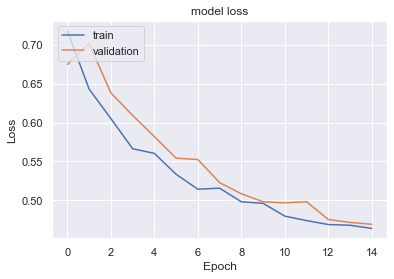

In [109]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.434370, G-Mean=0.753


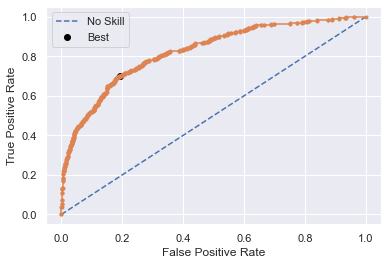

In [110]:
# predict probabilities
yhat1 = model_7.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

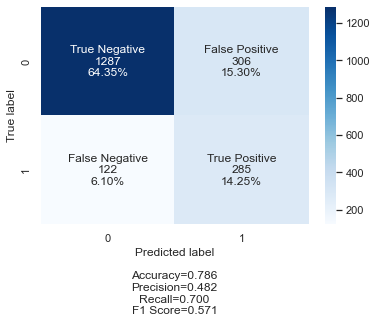

In [111]:
## Confusion Matrix on unseen test set
y_pred1 = model_7.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>thresholds1[ix]:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0


#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

Recall got improved up to 70% and Accuracy score is 79%.

### Conclusion:
* So after we built multiple neural network models and evaluating them, we can consider Model_5 with Early stopping and SGD Optimizer with defined Learning rate(0.001) as the best model
* The model has evaluation metrics as 
                precision    recall  f1-score   

           0       0.93      0.75      0.83   
           1       0.44      0.78      0.56      

        accuracy                           0.76      

### Let's find the feature importance using RandomForestClassifier:

In [112]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.8685

We've got 87% os Accuracy using RandomForest, now let's look at the Feature Importance

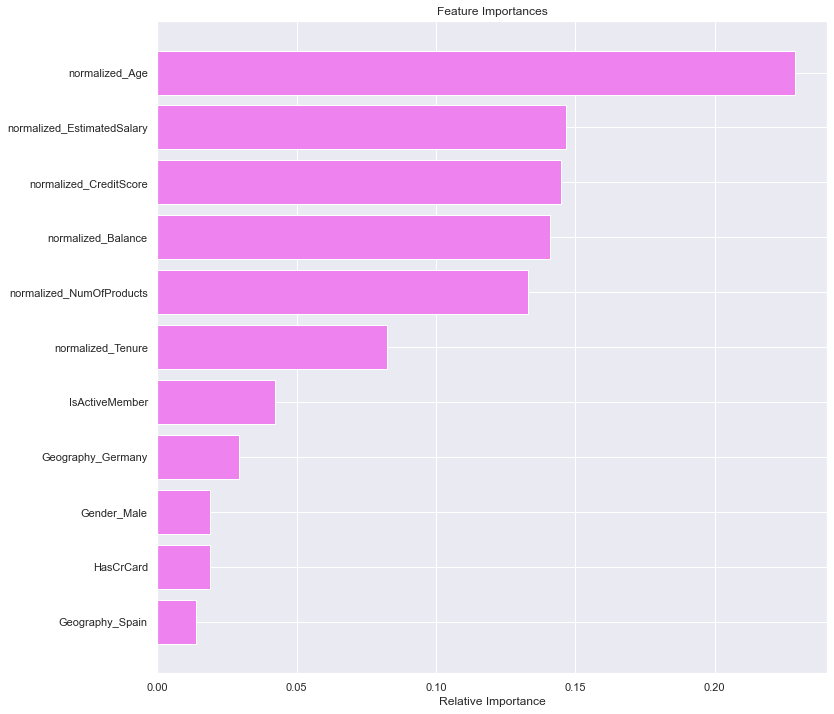

In [113]:
#Get Feature Importance
feature_names = X_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Recommendations:
* Age is the most important feature impacting the customers to leave the bank. Management should concentrate on customer over 50 years old who tend to quit the bank the most. Maybe they could come up with ideas of attracting the customers with special deals or products to keep them loyal.
* EstimatedSalary is the next one, seems as exited customers might have a higher Salary. It could be that customers leave cause they want to deposit money for a higher interest rates. Bank could come up with a strategy of increasing the Interest rates for a higher deposit amounts
* Customers with Low credit scores can be given a chance with a limited balance amount. However, bank needs to be careful, as people with low score considered to not payoff the balances. 
* Customers with High balances can be given a grace period, however bank needs to be also careful as not to lose money helping out those customers.
* Customers with many Number of Products tend to quit the bank. Maybe management should consider setting the limits on the amount of products they can apply to.